Za potrebe neke delavnice sem potreboval seznam popularnih komičnih serij in njihove posterje.

Prvi korak je očiten.

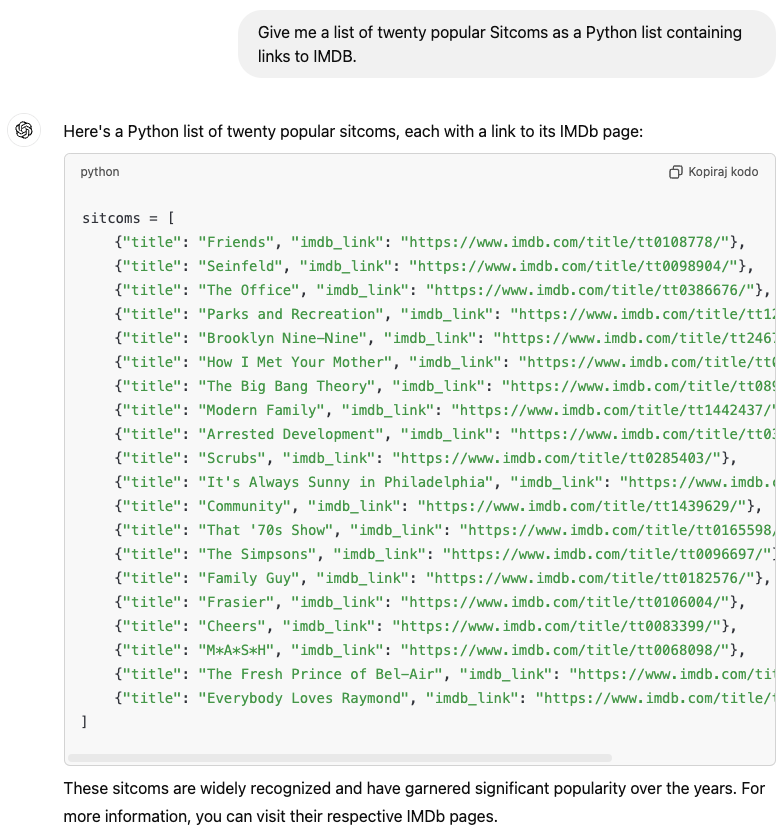

Pričakoval sem samo povezave, vendar nič hudega.

In [1]:
sitcoms = [
    {"title": "Friends", "imdb_link": "https://www.imdb.com/title/tt0108778/"},
    {"title": "Seinfeld", "imdb_link": "https://www.imdb.com/title/tt0098904/"},
    {"title": "The Office", "imdb_link": "https://www.imdb.com/title/tt0386676/"},
    {"title": "Parks and Recreation", "imdb_link": "https://www.imdb.com/title/tt1266020/"},
    {"title": "Brooklyn Nine-Nine", "imdb_link": "https://www.imdb.com/title/tt2467372/"},
    {"title": "How I Met Your Mother", "imdb_link": "https://www.imdb.com/title/tt0460649/"},
    {"title": "The Big Bang Theory", "imdb_link": "https://www.imdb.com/title/tt0898266/"},
    {"title": "Modern Family", "imdb_link": "https://www.imdb.com/title/tt1442437/"},
    {"title": "Arrested Development", "imdb_link": "https://www.imdb.com/title/tt0367279/"},
    {"title": "Scrubs", "imdb_link": "https://www.imdb.com/title/tt0285403/"},
    {"title": "It's Always Sunny in Philadelphia", "imdb_link": "https://www.imdb.com/title/tt0472954/"},
    {"title": "Community", "imdb_link": "https://www.imdb.com/title/tt1439629/"},
    {"title": "That '70s Show", "imdb_link": "https://www.imdb.com/title/tt0165598/"},
    {"title": "The Simpsons", "imdb_link": "https://www.imdb.com/title/tt0096697/"},
    {"title": "Family Guy", "imdb_link": "https://www.imdb.com/title/tt0182576/"},
    {"title": "Frasier", "imdb_link": "https://www.imdb.com/title/tt0106004/"},
    {"title": "Cheers", "imdb_link": "https://www.imdb.com/title/tt0083399/"},
    {"title": "M*A*S*H", "imdb_link": "https://www.imdb.com/title/tt0068098/"},
    {"title": "The Fresh Prince of Bel-Air", "imdb_link": "https://www.imdb.com/title/tt0098800/"},
    {"title": "Everybody Loves Raymond", "imdb_link": "https://www.imdb.com/title/tt0115167/"},
]

IMDB me tu niti ne zanima. Izbrskal sem namreč prijazno stran [https://www.omdbapi.com/](https://www.omdbapi.com/). Registriraš se, pa dobiš ključ, s katerim lahko zastonj narediš 1000 poizvedb dnevno. Zame čisto dovolj. Ker je čisto vseeno, če ne vidite mojega ključa (kar prosite za svojega), ga bom naložil iz datoteke, ki je ne bom javno objavil.

In [2]:
api_key = open("omdb-api-key.txt").read().strip()

Poizvedbe so oblike `http://www.omdbapi.com/?apikey={api_key}&{parametri}`. Iskati je mogoče po naslovih in še čem, zame je bilo najbolj uporabno iskati po kodah z imdb. Te je lahko dobiti

In [3]:
imdb_id = sitcoms[0]["imdb_link"].split("/")[-2]

imdb_id

'tt0108778'

`imdb_id` razdelimo s `split("/")` in vzamemo predzadnji del - zadnji je prazen, ker je na koncu poševnica.

In [4]:
from urllib.request import urlopen

response = urlopen(f"http://www.omdbapi.com/?apikey={api_key}&i={imdb_id}")
response.read()

b'{"Title":"Friends","Year":"1994\xe2\x80\x932004","Rated":"TV-14","Released":"22 Sep 1994","Runtime":"22 min","Genre":"Comedy, Romance","Director":"N/A","Writer":"David Crane, Marta Kauffman","Actors":"Jennifer Aniston, Courteney Cox, Lisa Kudrow","Plot":"Follows the personal and professional lives of six twenty to thirty year-old friends living in the Manhattan borough of New York City.","Language":"English, Spanish, Italian, French, Dutch, Hebrew","Country":"United States","Awards":"Won 6 Primetime Emmys. 79 wins & 231 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.9/10"}],"Metascore":"N/A","imdbRating":"8.9","imdbVotes":"1,122,459","imdbID":"tt0108778","Type":"series","totalSeasons":"10","Response":"True"}'

Najprej poglejmo, kaj sem naredil; potem pride, kaj sem dobil.

Uvozil sem funkcijo `urlopen` iz modula `urllib.request`. Kot argument ji podaš URL in vrne odgovor strežnika. Odgovor vsebuje marsikaj, recimo

In [5]:
response.status

200

ki je lahko 404 (če stran ne obstaja), 500 (če je z njo nekaj narobe) in 418, če se slučajno pogovarjamo s čajnikom. V našem primeru je 200, kar je `OK`. Še marsikaj lahko izvemo,

In [6]:
response.headers.items()

[('Date', 'Mon, 23 Dec 2024 22:04:24 GMT'),
 ('Content-Type', 'application/json; charset=utf-8'),
 ('Content-Length', '864'),
 ('Connection', 'close'),
 ('Cache-Control', 'public, max-age=86400'),
 ('Expires', 'Mon, 23 Dec 2024 22:34:37 GMT'),
 ('Last-Modified', 'Mon, 23 Dec 2024 21:34:37 GMT'),
 ('Vary', '*, Accept-Encoding'),
 ('X-AspNet-Version', '4.0.30319'),
 ('X-Powered-By', 'ASP.NET'),
 ('Access-Control-Allow-Origin', '*'),
 ('CF-Cache-Status', 'HIT'),
 ('Age', '1787'),
 ('Accept-Ranges', 'bytes'),
 ('Server', 'cloudflare'),
 ('CF-RAY', '8f6ba5aaee9b5a77-VIE')]

vendar nas nič od tega ne zanima. Tu moramo vedeti le, da ima `response` metodo `read`, ki vrne podatke, ki smo jih dobili. Zgoraj smo jih tudi že izpisali, zato so (tako kot pri datotekah) porabljeni. Prav, poberimo jih ponovno in jih tokrat tudi shranimo.

In [7]:
response = urlopen(f"http://www.omdbapi.com/?apikey={api_key}&i={imdb_id}")
data = response.read()

In [8]:
data

b'{"Title":"Friends","Year":"1994\xe2\x80\x932004","Rated":"TV-14","Released":"22 Sep 1994","Runtime":"22 min","Genre":"Comedy, Romance","Director":"N/A","Writer":"David Crane, Marta Kauffman","Actors":"Jennifer Aniston, Courteney Cox, Lisa Kudrow","Plot":"Follows the personal and professional lives of six twenty to thirty year-old friends living in the Manhattan borough of New York City.","Language":"English, Spanish, Italian, French, Dutch, Hebrew","Country":"United States","Awards":"Won 6 Primetime Emmys. 79 wins & 231 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.9/10"}],"Metascore":"N/A","imdbRating":"8.9","imdbVotes":"1,122,459","imdbID":"tt0108778","Type":"series","totalSeasons":"10","Response":"True"}'

Podatki so videti kot Pythonov slovar. V resnici so JSON, kar je, hm, približno Javascriptov slovar. V Pythonov slovar jih najbolj zanesljivo pretvorimo z `json.loads`.

In [9]:
import json

data = json.loads(data)

In [10]:
data

{'Title': 'Friends',
 'Year': '1994–2004',
 'Rated': 'TV-14',
 'Released': '22 Sep 1994',
 'Runtime': '22 min',
 'Genre': 'Comedy, Romance',
 'Director': 'N/A',
 'Writer': 'David Crane, Marta Kauffman',
 'Actors': 'Jennifer Aniston, Courteney Cox, Lisa Kudrow',
 'Plot': 'Follows the personal and professional lives of six twenty to thirty year-old friends living in the Manhattan borough of New York City.',
 'Language': 'English, Spanish, Italian, French, Dutch, Hebrew',
 'Country': 'United States',
 'Awards': 'Won 6 Primetime Emmys. 79 wins & 231 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.9/10'}],
 'Metascore': 'N/A',
 'imdbRating': '8.9',
 'imdbVotes': '1,122,459',
 'imdbID': 'tt0108778',
 'Type': 'series',
 'totalSeasons': '10',
 'Response': 'True'}

Rekel sem, da potrebujem slike. Dobil sem sicer precej uporabnih stvari, vendar za zdaj: slika. Ta je očitno v

In [11]:
img_url = data["Poster"]
img_url

'https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg'

No, ne slika, njen URL.

Če v tale Jupyter napišem `<img src="https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg"/>`, jo bo pokazal.

<img src="https://m.media-amazon.com/images/M/MV5BOTU2YmM5ZjctOGVlMC00YTczLTljM2MtYjhlNGI5YWMyZjFkXkEyXkFqcGc@._V1_SX300.jpg"/>

Jaz bi jo, seveda, hotel pobrati v datoteko.

In [12]:
poster = urlopen(img_url).read()

In [13]:
poster[:100]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\t\x06\t\t\t\t\x0c\x13\x0e\x0e\x0c\x0e\x0e\x19\x12\x0e\x12\x10\x17\x0e\x10\x10\x17\x10\x17\x17\x10\x14\x17\x14\x14\x1a\x17\x13\x13\x17\x1a\x14\x17\x18#\x18\x1c\x19\x1f\x1a\x18!\x18#\x18#""$\'(#\x17\'5\x01\t\t\x05\t\t\t\x0c\t\t\x13'

Karkoli že je v tem `poster`, očitno gre za sliko. Shranimo jo v datoteko, katere ime bo ime serije.

In [14]:
import os

fname = data["Title"] + os.path.splitext(img_url)[1]
open(fname, "wb").write(poster)

20545

Ne spreglejte drugega argumenta pri odpiranju datoteke: `"wb"`. `w` pove, kot že vemo, da želimo v datoteko pisati. `b` pove, da gre za binarno datoteko.

Pogledam v direktorij in, glej, tam je res datoteka "Friends.jpg" s posterjem serije (ki je, disclaimer, nikoli nisem gledal; čeprav sem bil ravno prav star, se mi je zdela malo ... cukrasta).

Zadovoljni z rezultatom, zložimo vse skupaj v dokončan program.

In [15]:
import os
import json
from urllib.request import urlopen

api_key = open("omdb-api-key.txt").read().strip()

for sitcom in sitcoms:  # sitcoms smo si pripravili prej
    imdb_id = sitcom["imdb_link"].split("/")[-2]
    response = urlopen(f"http://www.omdbapi.com/?apikey={api_key}&i={imdb_id}")
    data = response.read()
    data = json.loads(data)
    img_url = data["Poster"]
    poster = urlopen(img_url).read()
    open(data["Title"] + os.path.splitext(img_url)[1], "wb").write(poster)

Manjša sitnost: na Windows in Linux so določeni znaki v imenih datotek prepovedani:

Preden zapišemo datoteko, moramo ustrezno popraviti ime.

### Zaključek

O dveh stvareh se nismo razgovorili. Prva je široka, zelo široka: kako pošiljati bolj zapletene zahteve, delati s piškotki in tako naprej. Ter kako boljše razumeti odgovore, ki jih dobimo od strežnika. To sodi na področje razvoja spletnih aplikacij, s tem se tu res ne bomo ukvarjati.

Druga je, kaj je bil oni `poster`. Morda ste opazili, da je pred narekovajem `b`:

In [16]:
poster[:30]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x05\x05\t\x06'

S tem pa se bomo ukvarjali v naslednji temi.